In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Primera Parte

In [147]:
a=np.arange(20)
print(a[::4])

[ 0  4  8 12 16]


Text(0,0.5,'$Log_{10}$(MSE)')

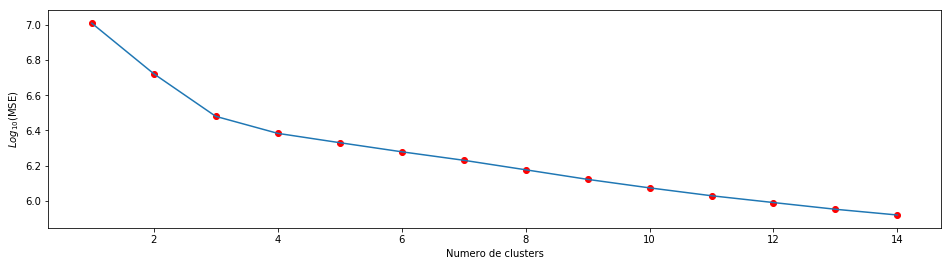

In [148]:
DATA=pd.read_csv("dengue.csv")
DATA=DATA.dropna()
features=['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']
X=DATA[features].values


n0=1
n_it=15
n_clusters=np.arange(n0,n_it)
km_score=np.zeros(n_it-n0)
for i in range(n0,n_it):
    km_score[i-n0]=1-KMeans(n_clusters=i).fit(X).score(X)
    
der=np.zeros(n_it-n0-1)
x_der=np.zeros(n_it-n0-1)
x_der[:]=n_clusters[:-1]+0.5

der[:]=km_score[1:]-km_score[:-1]

    

plt.figure(figsize=[16,4])
plt.plot(n_clusters,np.log10(km_score))
plt.scatter(n_clusters,np.log10(km_score),c='r')
plt.xlabel("Numero de clusters")
plt.ylabel("$Log_{10}$(MSE)")


Parece que el optimo de k-clusters esta en 3 clusters.

In [149]:
DATA2=pd.read_csv("BreadBasket_DMS.csv")
DATA2=DATA2.dropna()




def datearr(s,splitter="-"):
    ls=list(map(int,np.array(s.split(splitter))))
    return ls[0],ls[1],ls[2]

YY=np.zeros(len(DATA2))
MM=np.zeros(len(DATA2))
DD=np.zeros(len(DATA2))
hh=np.zeros(len(DATA2))
mm=np.zeros(len(DATA2))
ss=np.zeros(len(DATA2))
_=DATA2["Time"].values
__=DATA2["Date"].values
for i in range(len(DATA2)):
    YY[i],MM[i],DD[i]=datearr(__[i])
    hh[i],mm[i],ss[i]=datearr(_[i],":")
DATA2["YY"]=YY
DATA2["MM"]=MM
DATA2["DD"]=DD
DATA2["hh"]=hh
DATA2["mm"]=mm
DATA2["ss"]=ss

I=np.array(DATA2["Item"].values)
_=preprocessing.LabelEncoder()
_.fit(I)
I=_.transform(I)
DATA2["ITEM"]=I

labels=["MM","DD","hh","mm","Transaction"]#,"ITEM"]
Y=DATA2["ITEM"].values
X2=DATA2[labels].values

### PCA

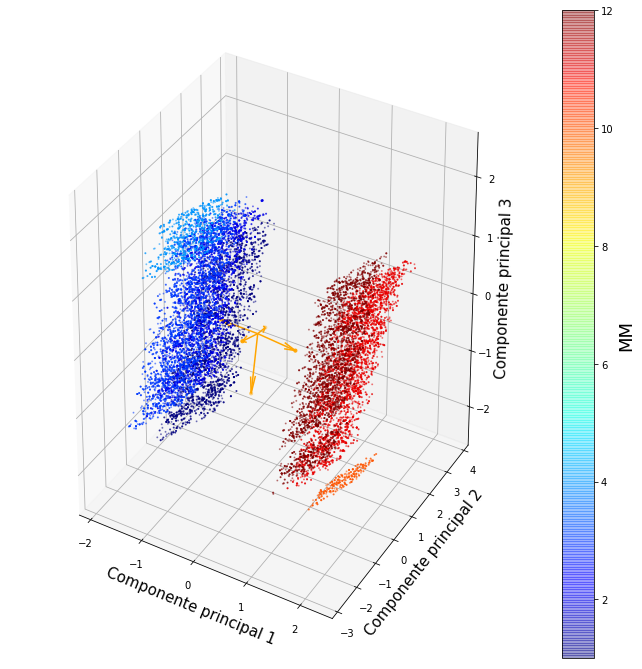

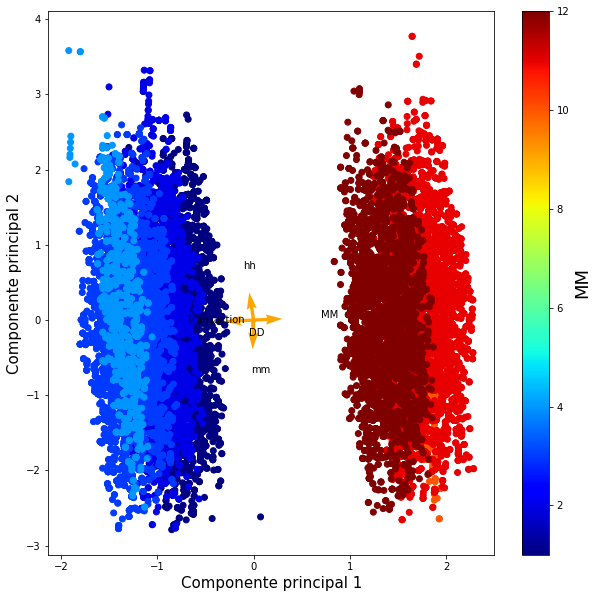

In [183]:
X2_t = StandardScaler().fit_transform(X2)
n_comps=len(labels)

pca=PCA(n_components=n_comps)
y_pca=pca.fit_transform(X2_t)
componentes=pca.components_
expvars=pca.explained_variance_ratio_

#for i in range (n_comps):
#    print("La componente Principal "+str(i+1)+" contiene "+str(round(expvars[i]*100,100))+"% de la varianza.")

proy=np.dot(componentes,np.identity(np.shape(componentes)[0]))

    
Ca=0
Cb=1
Cc=2
indic=0
CMP='jet'
    
PC1,PC2,PC3=componentes[Ca],componentes[Cb],componentes[Cc]
n_x=np.dot(X2_t,PC1)
n_y=np.dot(X2_t,PC2)
n_z=np.dot(X2_t,PC3)

p_x=np.dot(proy,PC1)
p_y=np.dot(proy,PC2)
p_z=np.dot(proy,PC3)


fig=plt.figure(figsize=[9,9])


ax = Axes3D(fig)
s=ax.scatter(n_x,n_y,n_z,c=X2.T[indic],cmap=CMP,s=1,alpha=0.4)
origin = [0], [0] ,[0]

ax.set_xlabel("Componente principal "+str(Ca+1),fontsize=15)
ax.set_ylabel("Componente principal "+str(Cb+1),fontsize=15)
ax.set_zlabel("Componente principal "+str(Cc+1),fontsize=15)
cb=plt.colorbar(s)
cb.set_label(labels[indic],fontsize=18)

ax.quiver(*origin, componentes[Ca,:], componentes[Cb,:],componentes[Cc,:], color='orange')
ax.scatter(componentes[Ca,:], componentes[Cb,:],componentes[Cc,:],color='orange',s=10)
#for i in range (len(labels)):
#    ax.text3D( componentes[Ca,i], componentes[Cb,i],componentes[Cb,i],s=labels[i])
#ax.scatter(p_x, p_y,p_z,color='orange',s=10)
#for i in range (len(labels)):
#    ax.text3D( p_x, p_y,p_z,s=labels[i])


#c=X2.T[indic]

origin = [0], [0] 
plt.figure(figsize=[10,10])
sc=plt.scatter(n_x,n_y,c=X2.T[indic],cmap=CMP)
plt.xlabel("Componente principal "+str(Ca+1),fontsize=15)
plt.ylabel("Componente principal "+str(Cb+1),fontsize=15)
plt.quiver(*origin, componentes[Ca,:], componentes[Cb,:], color='orange')
for i in range (len(labels)):
    plt.text( componentes[Ca,i], componentes[Cb,i],s=labels[i])
cb=plt.colorbar(sc)
cb.set_label(labels[indic],fontsize=18)

### K Means

/home/david/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Text(0,0.5,'MSE')

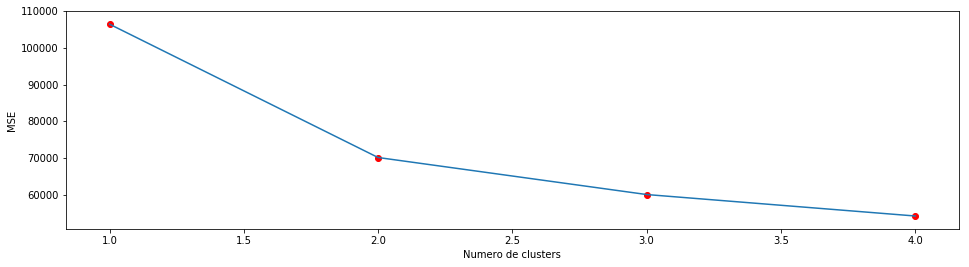

In [184]:
n0=1
n_it=len(labels)
n_clusters=np.arange(n0,n_it)
km_score=np.zeros(n_it-n0)
for i in range(n0,n_it):
    km_score[i-n0]=1-KMeans(init=pca.components_[:i],n_clusters=i).fit(X2_t).score(X2_t)
der=np.zeros(n_it-n0-1)
x_der=np.zeros(n_it-n0-1)
x_der[:]=n_clusters[:-1]+0.5
der[:]=km_score[1:]-km_score[:-1]


fig=plt.figure(figsize=[16,4])
ax=fig.add_subplot(111)
plt.plot(n_clusters,km_score)
plt.scatter(n_clusters,km_score,c='r')
plt.xlabel("Numero de clusters")
plt.ylabel("MSE")#"$Log_{10}$(MSE)")


Text(0.5,0,'Componente principal 3')

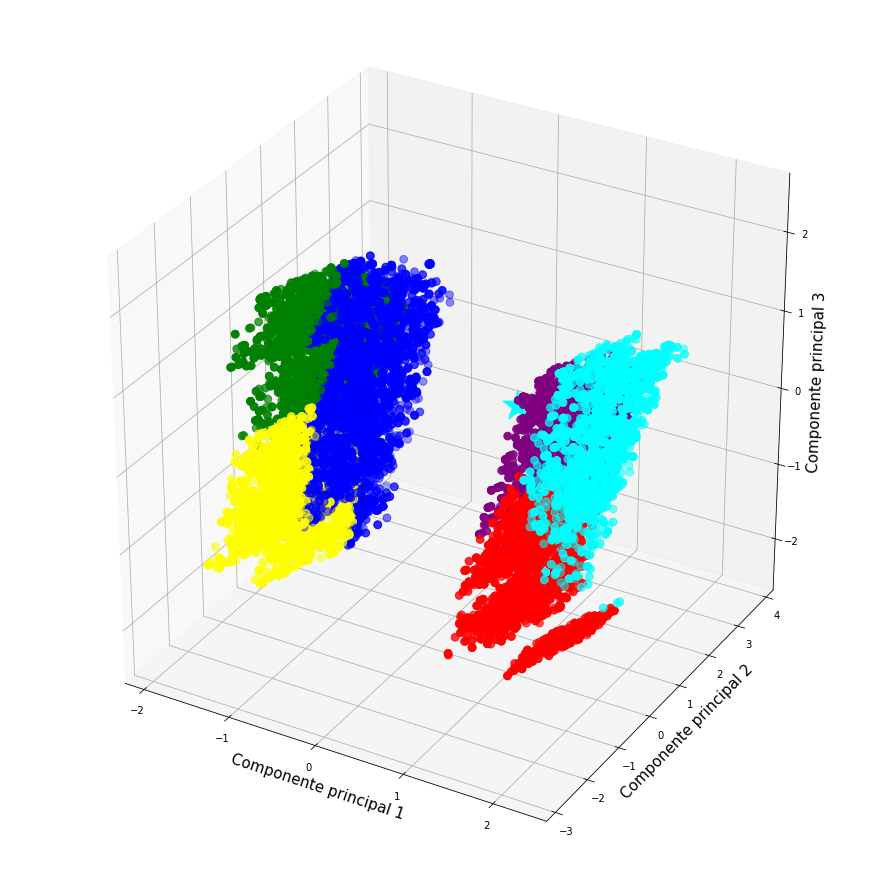

In [185]:
kmeans = KMeans(n_clusters=6).fit(X2_t)
centroids = kmeans.cluster_centers_

# Predicting the clusters
pred_x2 = kmeans.predict(X2_t)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow','purple']
asignar=[]
for row in pred_x2:
    asignar.append(colores[row])
asignar=np.array(asignar)

    
feg=plt.figure(figsize=[12,12])
ax = Axes3D(feg)
sc=ax.scatter(n_x, n_y,n_z, c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
ax.set_xlabel("Componente principal "+str(Ca+1),fontsize=15)
ax.set_ylabel("Componente principal "+str(Cb+1),fontsize=15)
ax.set_zlabel("Componente principal "+str(Cc+1),fontsize=15)

    


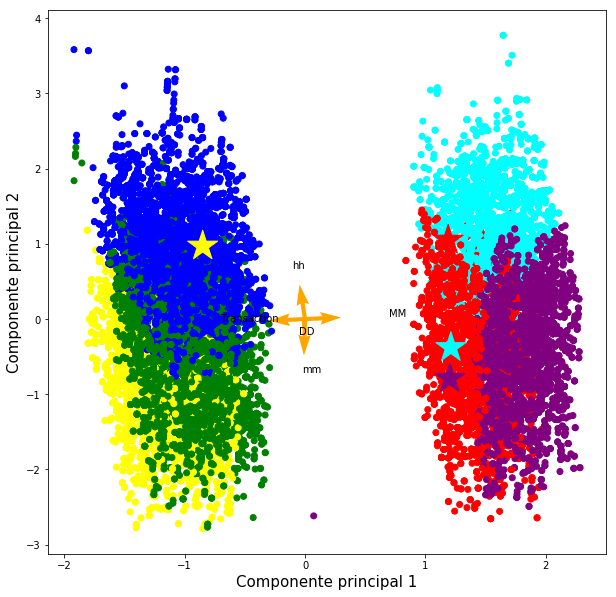

In [186]:
origin = [0], [0] 
fog=plt.figure(figsize=[10,10])
ax=fog.add_subplot(111)
sc=ax.scatter(n_x,n_y,c=asignar,cmap=CMP)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.xlabel("Componente principal "+str(Ca+1),fontsize=15)
plt.ylabel("Componente principal "+str(Cb+1),fontsize=15)

#plt.colorbar(sc)


#cb=plt.colorbar(sc)
#cb.set_label(labels[indic],fontsize=18)

plt.quiver(*origin, componentes[Ca,:], componentes[Cb,:], color='orange')
for i in range (len(labels)):
    plt.text( componentes[Ca,i], componentes[Cb,i],s=labels[i])
